In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import corner
import scipy.stats as ss

**Useful Functions**

In [2]:
def extract_samples (data, plist):
    nD_samples = np.zeros([len(data),len(plist)]);
    for i in range(len(plist)):
        nD_samples[:,i] = data[plist[i]];
    return nD_samples

In [3]:
def models(filename,key):
    plist = ['mchirp','q','chieff','z']
    model_nD_samples = pd.read_hdf(filename, key=key)
    samples_4D = extract_samples(model_nD_samples,plist)
    return samples_4D

In [4]:
def model_param_samples(filename,key,param):
    data_key = pd.read_hdf(filename, key=key)
    samples_1D = data_key[param]
    return samples_1D
 

**Chirpmass : chi = 0.0, alpha_CE = 1.0**

In [5]:
filename = '/Users/sayantanidatta/Documents/conference/ICTS2022/models_reduced.hdf5'
f = h5py.File(filename, 'r')
print(f.keys())
print(f['CE']['chi00']['alpha10'].keys())
print(f['CHE']['chi00'].keys())
print(f['GC']['chi00'].keys())
print(f['NSC']['chi00'].keys())
print(f['SMT']['chi00'].keys())

<KeysViewHDF5 ['CE', 'CHE', 'GC', 'NSC', 'SMT']>
<KeysViewHDF5 ['axis0', 'axis1', 'block0_items', 'block0_values']>
<KeysViewHDF5 ['axis0', 'axis1', 'block0_items', 'block0_values']>
<KeysViewHDF5 ['axis0', 'axis1', 'block0_items', 'block0_values']>
<KeysViewHDF5 ['axis0', 'axis1', 'block0_items', 'block0_values']>
<KeysViewHDF5 ['axis0', 'axis1', 'block0_items', 'block0_values']>


In [52]:
chipmass_samples_GC_chi00 = model_param_samples(filename,key='GC/chi00',param='mchirp')
chipmass_samples_NSC_chi00 = model_param_samples(filename,key='NSC/chi00',param='mchirp')
chipmass_samples_SMT_chi00 = model_param_samples(filename,key='SMT/chi00',param='mchirp')
chipmass_samples_CHE_chi00 = model_param_samples(filename,key='CHE/chi00',param='mchirp')
chipmass_samples_CE_chi00 = model_param_samples(filename,key='CE/chi00/alpha10',param='mchirp')
list_model_chirp_samples = [chipmass_samples_GC_chi00,chipmass_samples_NSC_chi00,chipmass_samples_SMT_chi00,
                           chipmass_samples_CHE_chi00,chipmass_samples_CE_chi00]

kde_chipmass_samples_GC_chi00 =ss.gaussian_kde(chipmass_samples_GC_chi00,bw_method=0.01)
kde_chipmass_samples_NSC_chi00=ss.gaussian_kde(chipmass_samples_NSC_chi00,bw_method=0.01)
kde_chipmass_samples_SMT_chi00=ss.gaussian_kde(chipmass_samples_SMT_chi00,bw_method=0.01)
kde_chipmass_samples_CHE_chi00=ss.gaussian_kde(chipmass_samples_CHE_chi00,bw_method=0.01)
kde_chipmass_samples_CE_chi00=ss.gaussian_kde(chipmass_samples_CE_chi00,bw_method=0.01)



In [53]:
chirpmass_min_models=[]
chirpmass_max_models=[]
for i in enumerate(list_model_chirp_samples):
    chirpmass_min_models.append(i[1].min())
    chirpmass_max_models.append(i[1].max())
    
all_models_mchirp_min = np.array(chirpmass_min_models).min()
all_models_mchirp_max = np.array(chirpmass_max_models).max()

dx=0.1
mchirp_x = np.arange(all_models_mchirp_min,all_models_mchirp_max,dx)
len(mchirp_x)


777

In [54]:
mchirp_GC_chi00_y = kde_chipmass_samples_GC_chi00(mchirp_x)
mchirp_NSC_chi00_y = kde_chipmass_samples_NSC_chi00(mchirp_x)
mchirp_SMT_chi00_y = kde_chipmass_samples_SMT_chi00(mchirp_x)
mchirp_CHE_chi00_y = kde_chipmass_samples_CHE_chi00(mchirp_x)
mchirp_CE_chi00_y = kde_chipmass_samples_CE_chi00(mchirp_x)

In [55]:
mchirp_GC_chi00_y  = mchirp_GC_chi00_y /np.sum(dx * mchirp_GC_chi00_y)
mchirp_NSC_chi00_y  = mchirp_NSC_chi00_y /np.sum(dx * mchirp_NSC_chi00_y)
mchirp_SMT_chi00_y  = mchirp_SMT_chi00_y /np.sum(dx * mchirp_SMT_chi00_y)
mchirp_CHE_chi00_y  = mchirp_CHE_chi00_y /np.sum(dx * mchirp_CHE_chi00_y)
mchirp_CE_chi00_y  = mchirp_CE_chi00_y /np.sum(dx * mchirp_CE_chi00_y)

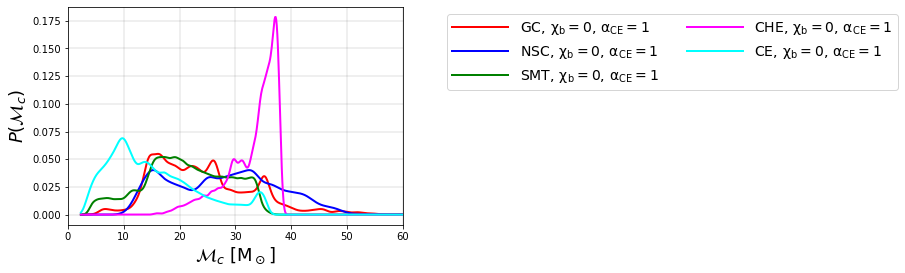

In [49]:
plt.plot(mchirp_x, mchirp_GC_chi00_y, label=r'$\mathrm{GC,\,\chi_b=0,\,\alpha_{CE}=1}$',
         lw=2, color='red')
plt.plot(mchirp_x, mchirp_NSC_chi00_y, label=r'$\mathrm{NSC,\,\chi_b=0,\,\alpha_{CE}=1}$',
         lw=2, color='blue')
plt.plot(mchirp_x, mchirp_SMT_chi00_y, label=r'$\mathrm{SMT,\,\chi_b=0,\,\alpha_{CE}=1}$',
         lw=2, color='green')
plt.plot(mchirp_x, mchirp_CHE_chi00_y, label=r'$\mathrm{CHE,\,\chi_b=0,\,\alpha_{CE}=1}$',
         lw=2, color='magenta')
plt.plot(mchirp_x, mchirp_CE_chi00_y, label=r'$\mathrm{CE,\,\chi_b=0,\,\alpha_{CE}=1}$',
         lw=2, color='cyan')
plt.legend(ncol=2, fontsize=14,  handlelength=4, loc='upper right',bbox_to_anchor =(2.5,1) )

plt.xlim(0,60)

plt.xlabel(r'$\mathcal{M}_c\ [\mathrm{M}_\odot]$',fontsize=18)
plt.ylabel(r'$P(\mathcal{M}_c)$',fontsize=18 )

#plt.grid(color='grey', linestyle='dotted', linewidth=1)
plt.grid(b=True, axis='both', alpha=0.6, color='k', linestyle='solid', linewidth=0.2)



**mass ratio,q : chi = 0.0, alpha_CE = 1.0**

In [51]:
q_samples_GC_chi00 = model_param_samples(filename,key='GC/chi00',param='q')
q_samples_NSC_chi00 = model_param_samples(filename,key='NSC/chi00',param='q')
q_samples_SMT_chi00 = model_param_samples(filename,key='SMT/chi00',param='q')
q_samples_CHE_chi00 = model_param_samples(filename,key='CHE/chi00',param='q')
q_samples_CE_chi00 = model_param_samples(filename,key='CE/chi00/alpha10',param='q')
list_model_q_samples = [q_samples_GC_chi00,q_samples_NSC_chi00,q_samples_SMT_chi00,
                           q_samples_CHE_chi00,q_samples_CE_chi00]


kde_q_samples_GC_chi00 =ss.gaussian_kde(q_samples_GC_chi00,bw_method=0.01)
kde_q_samples_NSC_chi00=ss.gaussian_kde(q_samples_NSC_chi00,bw_method=0.01)
kde_q_samples_SMT_chi00=ss.gaussian_kde(q_samples_SMT_chi00,bw_method=0.01)
kde_q_samples_CHE_chi00=ss.gaussian_kde(q_samples_CHE_chi00,bw_method=0.01)
kde_q_samples_CE_chi00=ss.gaussian_kde(q_samples_CE_chi00,bw_method=0.01)



In [66]:
q_min_models=[]
for i in enumerate(list_model_q_samples):
    q_min_models.append(i[1].min())

    
all_models_q_min = np.array(q_min_models).min()


dx=0.005
q_x = np.arange(all_models_q_min,1,dx)
len(q_x)

197

In [67]:
q_GC_chi00_y = kde_q_samples_GC_chi00(q_x)
q_NSC_chi00_y = kde_q_samples_NSC_chi00(q_x)
q_SMT_chi00_y = kde_q_samples_SMT_chi00(q_x)
q_CHE_chi00_y = kde_q_samples_CHE_chi00(q_x)
q_CE_chi00_y = kde_q_samples_CE_chi00(q_x)

In [68]:
q_GC_chi00_y  = q_GC_chi00_y /np.sum(dx * q_GC_chi00_y)
q_NSC_chi00_y  = q_NSC_chi00_y /np.sum(dx * q_NSC_chi00_y)
q_SMT_chi00_y  = q_SMT_chi00_y /np.sum(dx * q_SMT_chi00_y)
q_CHE_chi00_y  = q_CHE_chi00_y /np.sum(dx * q_CHE_chi00_y)
q_CE_chi00_y  = q_CE_chi00_y /np.sum(dx * q_CE_chi00_y)

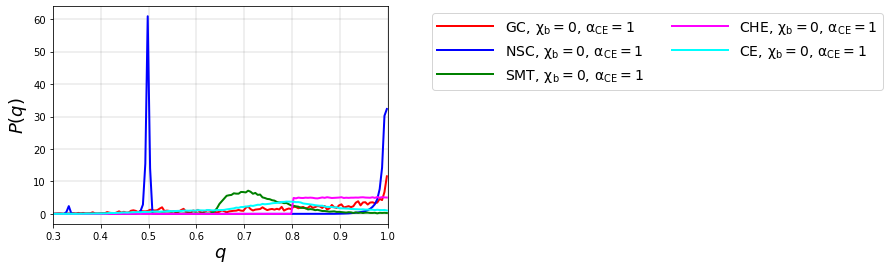

In [65]:
plt.plot(q_x, q_GC_chi00_y, label=r'$\mathrm{GC,\,\chi_b=0,\,\alpha_{CE}=1}$',
         lw=2, color='red')
plt.plot(q_x, q_NSC_chi00_y, label=r'$\mathrm{NSC,\,\chi_b=0,\,\alpha_{CE}=1}$',
         lw=2, color='blue')
plt.plot(q_x, q_SMT_chi00_y, label=r'$\mathrm{SMT,\,\chi_b=0,\,\alpha_{CE}=1}$',
         lw=2, color='green')
plt.plot(q_x, q_CHE_chi00_y, label=r'$\mathrm{CHE,\,\chi_b=0,\,\alpha_{CE}=1}$',
         lw=2, color='magenta')
plt.plot(q_x, q_CE_chi00_y, label=r'$\mathrm{CE,\,\chi_b=0,\,\alpha_{CE}=1}$',
         lw=2, color='cyan')
plt.legend(ncol=2, fontsize=14,  handlelength=4, loc='upper right',bbox_to_anchor =(2.5,1) )

plt.xlim(0.3,1)

plt.xlabel(r'$q$',fontsize=18)
plt.ylabel(r'$P(q)$',fontsize=18 )

#plt.grid(color='grey', linestyle='dotted', linewidth=1)
plt.grid(b=True, axis='both', alpha=0.6, color='k', linestyle='solid', linewidth=0.2)

